In [1]:
"""
Example 1.6
Srinath Bulusu
01303708
"""

import numpy as np
from scipy import integrate
from scipy.special import comb

import matplotlib.pyplot as plt
import math

n = 1000
k = 343

#not necessary because of normalization, cancels out!
#binomial coefficient blows up -> would lead to severe numerical issues
print(comb(n, k))

"""
functions for part a and b
"""
def prior_density_p_a(p):
    return p**2 * (1-p)**3

def prior_density_p_b(p):
    return math.sin(math.pi * p) * math.sin(math.pi * p)

def likelyhood(n, k, p):
    return p**(k) * (1-p)**(n-k)

4.7645834464310066e+277


In [2]:
f_p = lambda p: prior_density_p_a(p)

f_norm = integrate.quad(f_p, 0., 1.)

f_p_norm = lambda p: prior_density_p_a(p) /f_norm[0]


g_p_k = lambda p: likelyhood(n, k, p) * prior_density_p_a(p)

g_norm = integrate.quad(g_p_k, 0., 1.)

#print(g_norm)

In [3]:
g_p_k_norm = lambda p: likelyhood(n, k, p) * prior_density_p_a(p) / g_norm[0]
#g_p_k_norm(0.3)

In [4]:
p_values = np.linspace(0., 1., 2*n)
print(p_values)

[0.00000000e+00 5.00250125e-04 1.00050025e-03 ... 9.98999500e-01
 9.99499750e-01 1.00000000e+00]


In [5]:
g_p_k_values = [g_p_k_norm(p) for p in p_values]
f_p_values = [f_p_norm(p) for p in p_values]
#print(g_p_k_values)

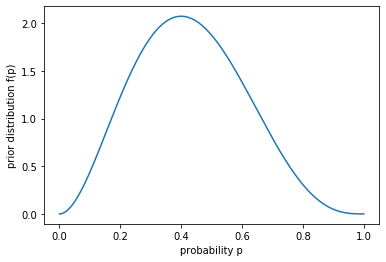

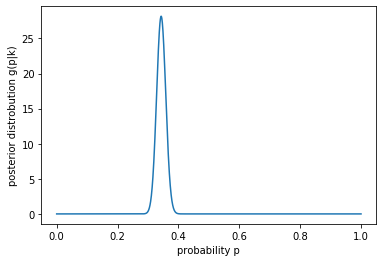

Mean of posterior distribution: 0.3630120722052369 
 with numerical accuracy: 2.614612064280003e-11
Variance of posterior distribution: 0.006812299234183458 
 with numerical accuracy: 2.7834320485874413e-11


In [6]:
"""
PART a of example 1.6
this cell is the output of the p²(1-p)³ prior function
"""
plt.plot(p_values, f_p_values)
plt.xlabel("probability p")
plt.ylabel("prior distribution f(p)")
plt.show()
plt.plot(p_values, g_p_k_values)
plt.xlabel("probability p")
plt.ylabel("posterior distrobution g(p|k)")
plt.show()

bayes_mean_g_p_k = lambda p: p * likelyhood(n, k, p) * prior_density_p_a(p) /g_norm[0]
bayes_mean2_g_p_k = lambda p: p * p * likelyhood(n, k, p) * prior_density_p_a(p) /g_norm[0]

mean_posterior = integrate.quad(bayes_mean_g_p_k, 0., 1.)
mean2_posterior = integrate.quad(bayes_mean2_g_p_k, 0., 1.)

var_posterior = abs(mean2_posterior[0] - mean_posterior[0]**2)
var_posterior_acc = abs(mean2_posterior[1]) + 2 * abs(mean_posterior[0] * mean_posterior[1])

print("Mean of posterior distribution: {} \n with numerical accuracy: {}".format(mean_posterior[0], mean_posterior[1]))
print("Variance of posterior distribution: {} \n with numerical accuracy: {}".format(var_posterior, var_posterior_acc))

In [7]:
f_p = lambda p: prior_density_p_b(p)

f_norm = integrate.quad(f_p, 0., 1.)

f_p_norm = lambda p: prior_density_p_b(p) /f_norm[0]


g_p_k = lambda p: likelyhood(n, k, p) * prior_density_p_b(p)

g_norm = integrate.quad(g_p_k, 0., 1.)

g_p_k_norm = lambda p: likelyhood(n, k, p) * prior_density_p_b(p) / g_norm[0]

p_values = np.linspace(0., 1., 2*n)
print(p_values)

g_p_k_values = [g_p_k_norm(p) for p in p_values]
f_p_values = [f_p_norm(p) for p in p_values]

[0.00000000e+00 5.00250125e-04 1.00050025e-03 ... 9.98999500e-01
 9.99499750e-01 1.00000000e+00]


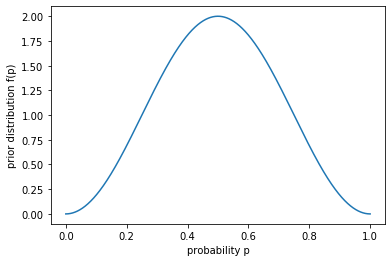

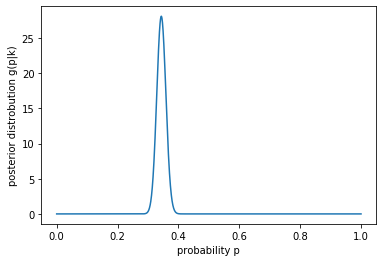

Mean of posterior distribution: 0.36311510052353635 
 with numerical accuracy: 2.5768209502517132e-11
Variance of posterior distribution: 0.0066800627791547 
 with numerical accuracy: 2.7394487424754014e-11


In [8]:
"""
PART b of example 1.6
this cell is the output of the sin² prior function
"""
plt.plot(p_values, f_p_values)
plt.xlabel("probability p")
plt.ylabel("prior distribution f(p)")
plt.show()
plt.plot(p_values, g_p_k_values)
plt.xlabel("probability p")
plt.ylabel("posterior distrobution g(p|k)")
plt.show()

bayes_mean_g_p_k = lambda p: p * likelyhood(n, k, p) * prior_density_p_b(p) /g_norm[0]
bayes_mean2_g_p_k = lambda p: p * p * likelyhood(n, k, p) * prior_density_p_b(p) /g_norm[0]

mean_posterior = integrate.quad(bayes_mean_g_p_k, 0., 1.)
mean2_posterior = integrate.quad(bayes_mean2_g_p_k, 0., 1.)

var_posterior = abs(mean2_posterior[0] - mean_posterior[0]**2)
var_posterior_acc = abs(mean2_posterior[1]) + 2 * abs(mean_posterior[0] * mean_posterior[1])

print("Mean of posterior distribution: {} \n with numerical accuracy: {}".format(mean_posterior[0], mean_posterior[1]))
print("Variance of posterior distribution: {} \n with numerical accuracy: {}".format(var_posterior, var_posterior_acc))